<a href="https://colab.research.google.com/github/JALVARADORUIZ/Magister_BigData_UB/blob/main/M6_AI2_AlvaradoRuizJoseArmando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*PADAWAN*: 


##JOSE ARMANDO ALVARADO RUIZ

# **Tema 2. KNN**

**Entrega: ACCIDENTES CEREBROVACULARES**


# **Descripción de la tarea**

###Contexto

Según la Organización Mundial de la Salud (OMS), el accidente cerebrovascular es la segunda causa principal de muerte a nivel mundial, responsable de, aproximadamente, el 11% del total de muertes.

Un accidente cerebrovascular ocurre cuando el suministro de sangre a una parte del cerebro se interrumpe o se reduce, lo que impide que el tejido cerebral reciba oxígeno y nutrientes. Las células cerebrales comienzan a morir en minutos.


Este conjunto de datos se utiliza para predecir si es probable que un paciente sufra un accidente cerebrovascular en función de los parámetros de entrada como el sexo, la edad, diversas enfermedades y el tabaquismo. Cada fila de datos proporciona información relevante sobre el paciente.

Información de atributos: 

- Id: identificador único. 
- Gender: "Masculino", "Femenino" u "Otro". 
- Age: edad del paciente. 
- Hypertension: 0 si el paciente no tiene hipertensión, 1 si el paciente tiene hipertensión.
- Heart_disease: 0 si el paciente no tiene ninguna enfermedad cardíaca, 1 si el paciente tiene una enfermedad cardíaca. 
- Ever_married: si ha estado alguna vez casado: "No" o "Yes". 
- Work_type: "Children/Cuidado de hijos", "Govt_job/Funcionario del Gobierno", "Never_worked/Nunca ha trabajado", "Private/trabajador por cuenta ajena" o "Self-employeed/Trabajador por cuenta propia". 
- Residence_type: "Rural" o "Urbano". 
- Avg_glucose_level: nivel medio de glucosa en sangre. 
- Bmi: índice de masa corporal (IMC). 
- Smoking_status: "Fue fumador", "Nunca ha fumado", "Fuma actualmente" o "Desconocido". 
- Stroke: 1 si el paciente tuvo un accidente cerebrovascular o 0 si no lo tuvo. 



### **Importación librerias**

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
from sklearn.tree import plot_tree
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

# Carga de Datos y visualización general

In [208]:
# Cargo la data en repositorio github para un acceso más rápido:
file_name = 'https://raw.githubusercontent.com/JALVARADORUIZ/Magister_BigData_UB/main/act1_healthcare-dataset-stroke-data.csv'

# Genero Dataframe
df = pd.read_csv(file_name)


Visualización de 5 registros aleatorios del dataset.

---




In [209]:
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1429,13062,Male,18.0,0,0,No,Private,Rural,123.79,20.5,Unknown,0
2827,67880,Male,5.0,0,0,No,children,Urban,148.52,20.6,Unknown,0
1445,47330,Male,9.0,0,0,No,children,Rural,60.39,16.4,Unknown,0
3335,6540,Female,41.0,0,0,Yes,Private,Rural,93.67,35.9,Unknown,0
4574,32571,Male,33.0,0,0,Yes,Private,Urban,85.27,25.8,Unknown,0


In [45]:
df.shape

(5110, 12)

El dataset cuenta con 5110 registros con 12 variables incluida la variable respuesta stroke.

In [46]:
# Estructura dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [47]:
# Analisis global de datos estadisticos de la muestra de variables cuantitativas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [48]:
# Descripcion de variables categoricas:
df.describe(include=object).T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


In [93]:
# Analisis Valores faltantes en dataset
missing_number = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])

missing_values


,Missing_Number,Missing_Percent
bmi,201,0.039335
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000


La variable bmi es la unica que presenta valores faltantes dentro del dataset.

## **Consideraciones:**

- "Desconocido" en smoking_status significa que la información no está disponible para este paciente. 
- IMC: peso en kilogramos dividido por el cuadrado de la talla en metros (kg/m2). Es un índice utilizado frecuentemente para clasificar el sobrepeso y la obesidad en personas adultas. La OMS define el sobrepeso como un IMC igual o superior a 25, y la obesidad como un IMC igual o superior a 30. 

- La hipertensión, también conocida como tensión arterial alta o elevada, es un trastorno en el que los vasos sanguíneos tienen una tensión persistentemente alta, lo que puede dañarlos. Cada vez que el corazón late, bombea sangre a los vasos y estos llevan la sangre a todas las partes del cuerpo. La tensión arterial es la fuerza que ejerce la sangre contra las paredes de los vasos (arterias) al ser bombeada por el corazón. Cuánto más alta es la tensión, más esfuerzo tiene que realizar el corazón para bombear. Para establecer el diagnóstico de hipertensión, se han de tomar mediciones dos días distintos y, en ambas lecturas, la tensión sistólica ha de ser superior o igual a 140 mmHg y la diastólica superior o igual a 90 mmHg. 

# Preprocesado



#### Transformación variable work_type

Esta variable la agruparemos en "Trabaja" o "No Trabaja", ya que de acuerdo a la naturaleza del análisis no es relevante mantener si es un trabajador de gobierno o trabaja en forma independiente. 

In [210]:
# Creamos dictionario con nuevos valores segun la clase actual de  'work_type'
new_work_type ={'Private' : 'Trabaja',
                 'Self-employed' : 'Trabaja',
                 'children': 'No Trabaja',
                 'Govt_job' : 'Trabaja',
                 'Never_worked' : 'No Trabaja'
                }
# Asignamos nuevos valores
df['work_type'].replace(new_work_type, inplace = True)

#### Variable Gender

Esta variable cuenta con 3 clases, pero la clase Other solo tiene un registro, por lo que vamos a eliminar este registro para evitar inconsistencia al momento de generar el modelo.

In [211]:
df.drop(df[df.gender == "Other"].index, axis = 0, inplace=True)
df.reset_index(drop = True)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Trabaja,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Trabaja,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Trabaja,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Trabaja,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Trabaja,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,18234,Female,80.0,1,0,Yes,Trabaja,Urban,83.75,NaN,never smoked,0
5105,44873,Female,81.0,0,0,Yes,Trabaja,Urban,125.20,40.0,never smoked,0
5106,19723,Female,35.0,0,0,Yes,Trabaja,Rural,82.99,30.6,never smoked,0
5107,37544,Male,51.0,0,0,Yes,Trabaja,Rural,166.29,25.6,formerly smoked,0


#### Variable BMI

Existen 201 personas de las que se desconoce su BMI (IMC); vamos a eliminar estos casos para la generación del modelo al tratarse de un bajo porcentaje (4%).



In [212]:
# Filtro las personas que se desconoce su BMI
filtro_bmi_unknown = df[df["bmi"].isnull()]
filtro_bmi_unknown.shape

(201, 12)

In [213]:
# Elimino las filas seleccionadas en el filtro
df.drop(filtro_bmi_unknown.index, axis=0, inplace=True)
df.reset_index(drop = True)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Trabaja,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Trabaja,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Trabaja,Urban,171.23,34.4,smokes,1
3,1665,Female,79.0,1,0,Yes,Trabaja,Rural,174.12,24.0,never smoked,1
4,56669,Male,81.0,0,0,Yes,Trabaja,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4903,14180,Female,13.0,0,0,No,No Trabaja,Rural,103.08,18.6,Unknown,0
4904,44873,Female,81.0,0,0,Yes,Trabaja,Urban,125.20,40.0,never smoked,0
4905,19723,Female,35.0,0,0,Yes,Trabaja,Rural,82.99,30.6,never smoked,0
4906,37544,Male,51.0,0,0,Yes,Trabaja,Rural,166.29,25.6,formerly smoked,0


Ahora podemos agrupar la variable "bmi" de acuerdo a su clasificación:

- Menor a 18.5 : 	Bajo Peso
- 18.5—24.9	: Saludable
- 25.0—29.9 : Sobre Peso
- 30.0 y más :	Obeso

In [214]:
df['bmi'] = pd.cut(x = df['bmi'], bins=[0,18.4,24.9,29.9,100],
                     labels=['Bajo Peso','Saludable','Sobre Peso', 'Obeso'])

In [215]:
df["bmi"].value_counts()

Obeso         1920
Sobre Peso    1409
Saludable     1242
Bajo Peso      337
Name: bmi, dtype: int64

#### Convertir todas las variables categóricas a numéricas.

In [216]:
columns_transform = ["gender","ever_married","work_type","Residence_type","bmi","smoking_status"]

In [217]:
# Utilizamos la funcion de pandas get_dummies para las transformación de las columnas categoricas, utilizamos 
# metodo ya que son variables nominales (Se podría ocupar igual OneHotEncoder)

df = pd.get_dummies(df, columns_transform)#, drop_first=True)


In [218]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_No Trabaja,work_type_Trabaja,Residence_type_Rural,Residence_type_Urban,bmi_Bajo Peso,bmi_Saludable,bmi_Sobre Peso,bmi_Obeso,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0
2,31112,80.0,0,1,105.92,1,0,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0
3,60182,49.0,0,0,171.23,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,1,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0
5,56669,81.0,0,0,186.21,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0


In [219]:
# Comprobación que todas las variables son numericas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4908 non-null   int64  
 1   age                             4908 non-null   float64
 2   hypertension                    4908 non-null   int64  
 3   heart_disease                   4908 non-null   int64  
 4   avg_glucose_level               4908 non-null   float64
 5   stroke                          4908 non-null   int64  
 6   gender_Female                   4908 non-null   uint8  
 7   gender_Male                     4908 non-null   uint8  
 8   ever_married_No                 4908 non-null   uint8  
 9   ever_married_Yes                4908 non-null   uint8  
 10  work_type_No Trabaja            4908 non-null   uint8  
 11  work_type_Trabaja               4908 non-null   uint8  
 12  Residence_type_Rural            49

#### Correlación de las Variables

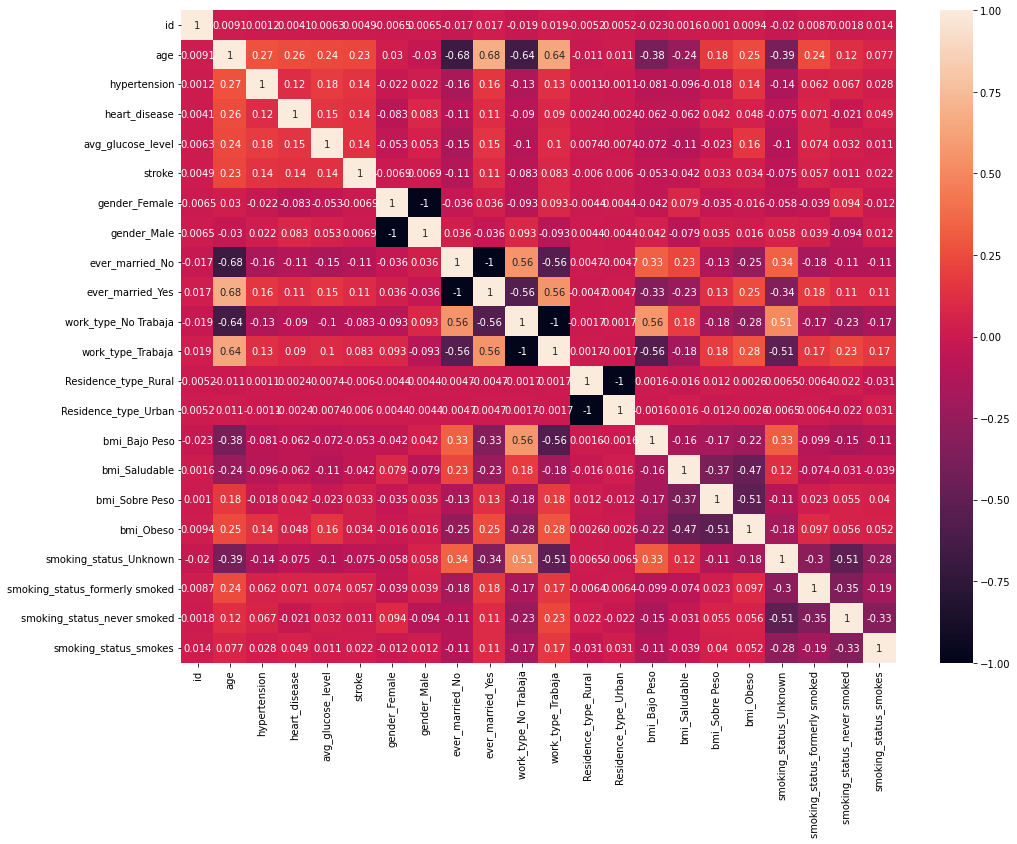

In [220]:
plt.rcParams["figure.figsize"] = (16,12)
sns.heatmap(df.corr(), annot=True)

#### Escalado de los datos para su uso por el algoritmo.

In [221]:
# Defino las variables predictoras y respuestas.
X = df.drop(['stroke'], axis=1)
y = df['stroke'].to_frame()

In [222]:
#Escalado de los datos predictoras:
scaled = StandardScaler().fit_transform(X)

In [223]:
# Genero DataFrame con la data escalada
df_scaled = pd.DataFrame(scaled, columns=X.columns)

In [224]:
df_scaled.shape

(4908, 21)

In [225]:
df_scaled = pd.concat([df_scaled,y], axis=1)

In [226]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5101 entries, 0 to 5109
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4908 non-null   float64
 1   age                             4908 non-null   float64
 2   hypertension                    4908 non-null   float64
 3   heart_disease                   4908 non-null   float64
 4   avg_glucose_level               4908 non-null   float64
 5   gender_Female                   4908 non-null   float64
 6   gender_Male                     4908 non-null   float64
 7   ever_married_No                 4908 non-null   float64
 8   ever_married_Yes                4908 non-null   float64
 9   work_type_No Trabaja            4908 non-null   float64
 10  work_type_Trabaja               4908 non-null   float64
 11  Residence_type_Rural            4908 non-null   float64
 12  Residence_type_Urban            49

# Generar un modelo con el algoritmo de KNN. 

In [231]:
# Reordeno el Dataframe.
df_scaled = df_scaled.sample(frac=1.0, random_state=42)

# Evito problemas con valores muy inferiores al trabajar con dtype float:
df_scaled = df_scaled[~df_scaled.isin([np.nan, np.inf, -np.inf]).any(1)]

Gráfico histograma de la variable Stroke (respuesta) para visualizar el desbalance de datos.

Stroke: 209, No Stroke: 4699 , ratio: 0.04447754841455629



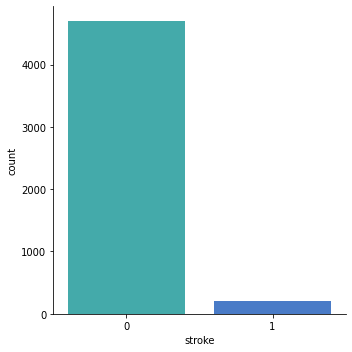

In [228]:
positivo = df[df.stroke==1].shape[0]
negativo = df[df.stroke==0].shape[0]
print("Stroke: " + str(positivo) + ", No Stroke: " + str(negativo), ", ratio: " + str(positivo/negativo) + "\n")
sns.catplot(data=df, x="stroke", kind="count", palette="winter_r", alpha=.8)

En este caso, un modelo que lo único que haga sea decir si "el paciente no ha tenido un accidente cerebrovascular" nos daría un "accuracy" ~ 95.6%.

Los registros de los casos de accidente cerebrovascular en comparación con los casos sin accidente cerebrovascular en el conjunto de datos muestran un Desbalance. Para garantizar un rendimiento óptimo del algoritmo KNN, usaremos la técnica de Cross-Validation.

In [232]:
# Selección del modelo KNN con Cross Validation

X = df_scaled.iloc[:,0:-1]
Y = df_scaled.iloc[:,-1]

In [233]:
preds_list = []
score_list = []
k_list = []

for k in list(range(1, 20, 2)):
  knn_model = KNeighborsClassifier(n_neighbors=k, weights="uniform", metric="minkowski")
  preds = cross_val_predict(knn_model, X, Y, cv=3, method="predict", n_jobs=3)
  score = cross_val_score(knn_model, X, Y, cv=3, scoring="accuracy")
  k_list.append(k)
  preds_list.append(preds)
  score_list.append(score.mean())

In [234]:
df_scores = pd.DataFrame({"K":k_list, "score":score_list})

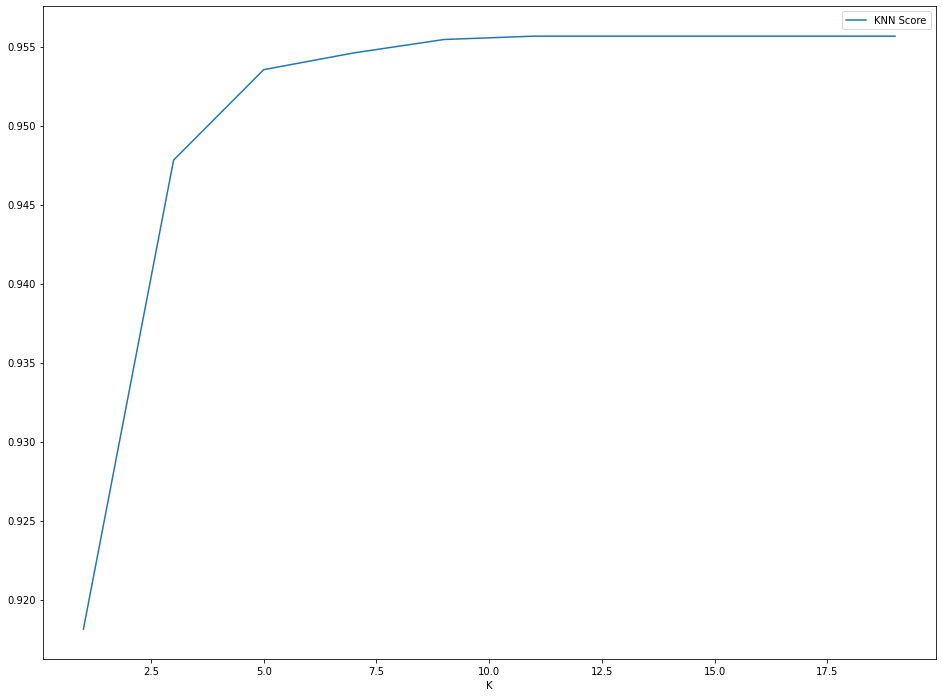

In [235]:
df_scores.set_index("K")["score"].plot(label="KNN Score")
plt.legend()
plt.show();

De acuerdo al gráfico, optamos con un k=9 para entrenar al modelo.

In [236]:
# Entrenamos modelo
knn_model = KNeighborsClassifier(n_neighbors=9, weights="uniform", metric="minkowski")
preds = cross_val_predict(knn_model, X, Y, cv=3, method="predict", n_jobs=3)
score = cross_val_score(knn_model, X, Y, cv=3, scoring="accuracy", n_jobs=3)
score

array([0.95547074, 0.95547074, 0.95544239])

# Evaluación del modelo 

In [237]:
print("Accuracy Promedio:", np.mean(score))

Accuracy Promedio: 0.9554612897356615


#### Matriz de Confusión

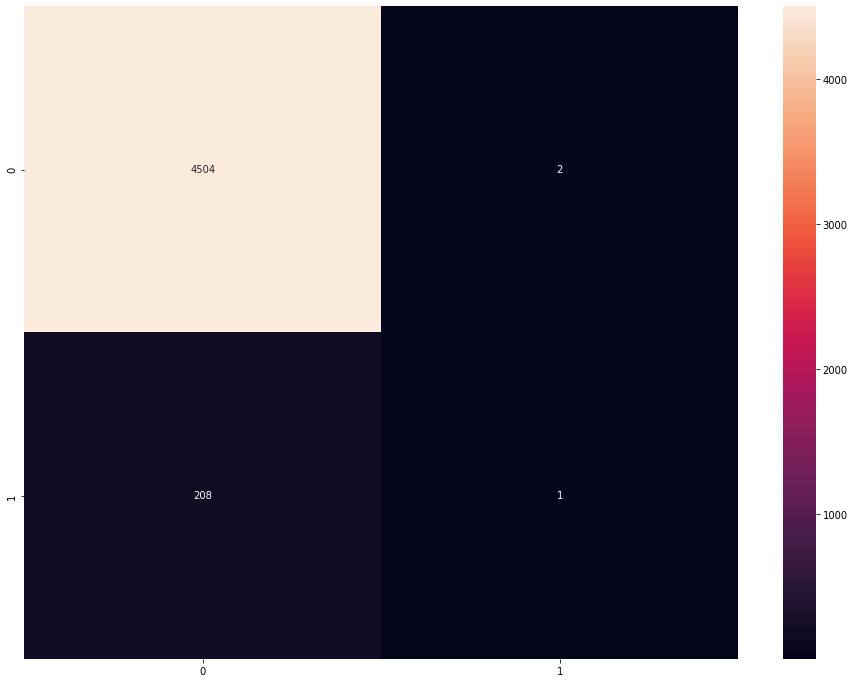

In [238]:

cm = confusion_matrix(Y, preds)
f = sns.heatmap(cm, annot=True, fmt='d')

#### Reporte de Clasificación (Precisión, Recall, Accuracy)


In [239]:
print (classification_report(Y, preds))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      4506
         1.0       0.33      0.00      0.01       209

    accuracy                           0.96      4715
   macro avg       0.64      0.50      0.49      4715
weighted avg       0.93      0.96      0.93      4715



**Conclusiones Preliminares:**

* El modelo KNN en su mejor versión es identico al modelo simple, ambos con un 96% aproximado.

* Si visualizamos la Matriz de Confusión podemos ver que, de los 209 stroke reales (valor = 1) sólo ha acertado en 1 caso, o sea tiene un 0% de acierto.

* De los 4699 casos stroke = 0 ha acertado 4504 casos (96%).

Tenemos un modelo con un muy bajo valor de Precision (33%) y de Recall (0%) para la clase 1 y por el contrario tenemos una alta Precision (96%) y Recall (100%) para la clase 0. O sea nuestro modelo es eficiente para determinar la no ocurrencia de accidente cerebrovascular pero no es preciso para la determinación de ocurrencia de accidente cerebrovascular.

De los resultados anteriores, se puede deducir que "accuracy" no es la mejor forma de evaluar este modelos de clasificación ya que los datos está desbalanceados (solo se dispone de un 4% de clase = 1).

Vamos a dibujar una gráfica donde podamos decidir cómo queremos que sea nuestro modelo sin tener en cuenta "accuracy" sino la balanza entre un buen recall o una buena precision. Para ello vamos a necesitar saber la probabilidad que otorga KNN a cada una de sus predicciones.

In [240]:
knn_model = KNeighborsClassifier(n_neighbors=9, weights="uniform", metric="minkowski")
probs = cross_val_predict(knn_model, X, Y, cv=3, method="predict_proba", n_jobs=3)
preds = cross_val_predict(knn_model, X, Y, cv=3, method="predict", n_jobs=3)

In [241]:
probs

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [0.88888889, 0.11111111],
       [1.        , 0.        ]])

In [242]:
# Probabilidad clase 1 (stroke = 1)
probs[:,1]

array([0.        , 0.        , 0.        , ..., 0.        , 0.11111111,
       0.        ])

In [243]:
df_dict = {"prob_stroke_0": probs[:,0],
           "prob_stroke_1": probs[:,1],
           "preds":preds}
df_probs = pd.DataFrame(df_dict)
df_probs.head()

,prob_stroke_0,prob_stroke_1,preds
0,1.000000,0.000000,0.0
1,1.000000,0.000000,0.0
2,1.000000,0.000000,0.0
3,0.888889,0.111111,0.0
4,1.000000,0.000000,0.0


In [244]:
df_probs[df_probs["preds"]==1]["prob_stroke_0"].max()

0.4444444444444444

Por defecto, KNN predice 0 o 1, si el valor de la probabilidad supera el 50%.

Ahora si queremos mejorar Recall o Precision, probaremos ser menos estrictos para que una predicción sea stroke = 1, aunque tendremos menos Falsos Negativos pero así aumentará nuestro RECALL.

In [245]:
precision, recall, limite = precision_recall_curve(Y,probs[:,1])

#### Curva Precision vs Recall

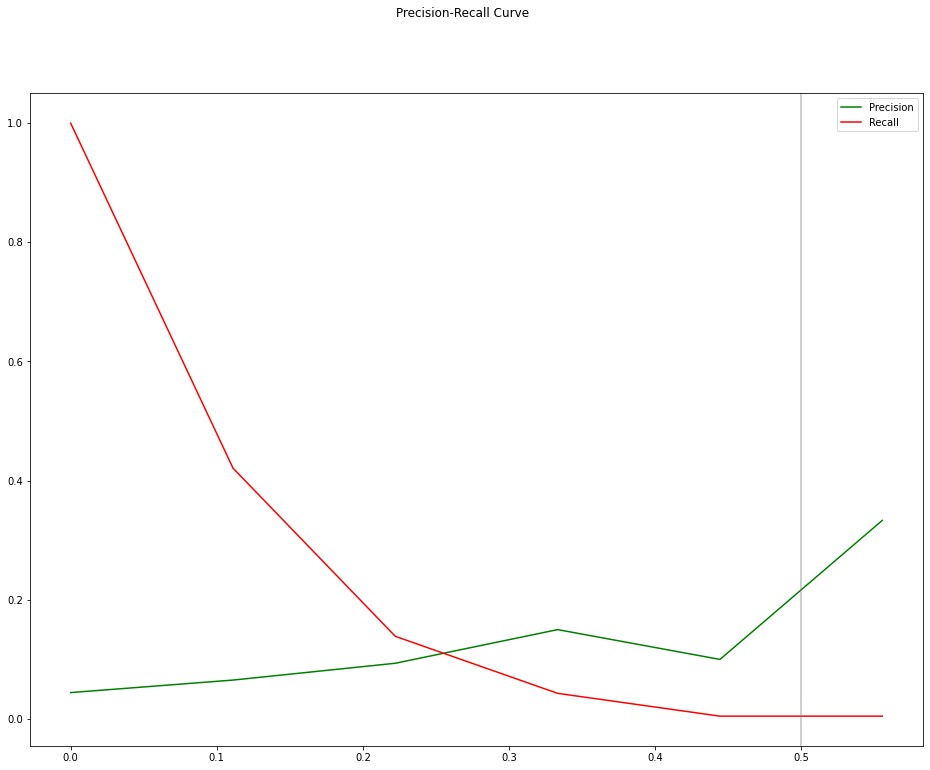

In [246]:
plt.plot(limite, precision[:-1], c="green", label="Precision")
plt.plot(limite, recall[:-1], c="red", label="Recall")
plt.axvline(0.5, alpha=0.5, c="gray")
plt.suptitle("Precision-Recall Curve")
plt.legend()
plt.show()

La línea vertical ubicada en 0.5 corta a cada una de las curvas en sus valores: 0.33 y 0.0 .

Deseamos disminuir los Falsos Negativos (FN) para obtener un aumento en Recall.

Atendiendo a la curva de arriba debemos disminuir el límite de 50%.

Probaremos con 40%, 30%, 20% y 10%.

In [247]:
df_probs["preds_10"] = 0
df_probs["preds_20"] = 0
df_probs["preds_30"] = 0
df_probs["preds_40"] = 0

df_probs.loc[df_probs["prob_stroke_1"]>0.1, "preds_10"] = 1
df_probs.loc[df_probs["prob_stroke_1"]>0.2, "preds_20"] = 1
df_probs.loc[df_probs["prob_stroke_1"]>0.3, "preds_30"] = 1
df_probs.loc[df_probs["prob_stroke_1"]>0.4, "preds_40"] = 1

In [248]:
df_probs

,prob_stroke_0,prob_stroke_1,preds,preds_10,preds_20,preds_30,preds_40
0,1.000000,0.000000,0.0,0,0,0,0
1,1.000000,0.000000,0.0,0,0,0,0
2,1.000000,0.000000,0.0,0,0,0,0
3,0.888889,0.111111,0.0,1,0,0,0
4,1.000000,0.000000,0.0,0,0,0,0
...,...,...,...,...,...,...,...
4710,1.000000,0.000000,0.0,0,0,0,0
4711,0.888889,0.111111,0.0,1,0,0,0
4712,1.000000,0.000000,0.0,0,0,0,0
4713,0.888889,0.111111,0.0,1,0,0,0


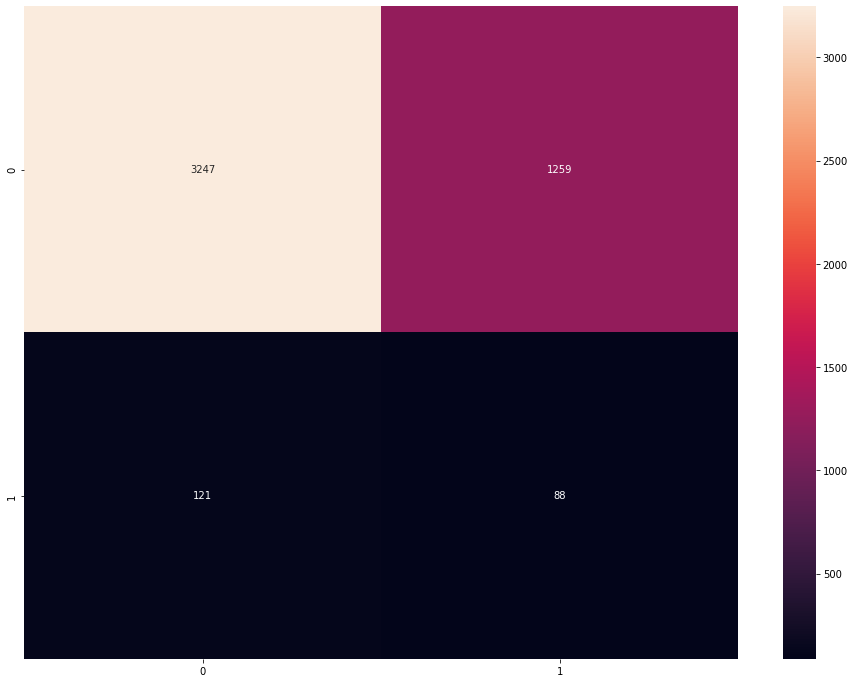

In [249]:
# Caso corte en 10%
cm_10 = confusion_matrix(Y, df_probs["preds_10"])
f = sns.heatmap(cm_10, annot=True, fmt='d')

In [250]:
print(classification_report(Y, df_probs["preds_10"]))

              precision    recall  f1-score   support

         0.0       0.96      0.72      0.82      4506
         1.0       0.07      0.42      0.11       209

    accuracy                           0.71      4715
   macro avg       0.51      0.57      0.47      4715
weighted avg       0.92      0.71      0.79      4715



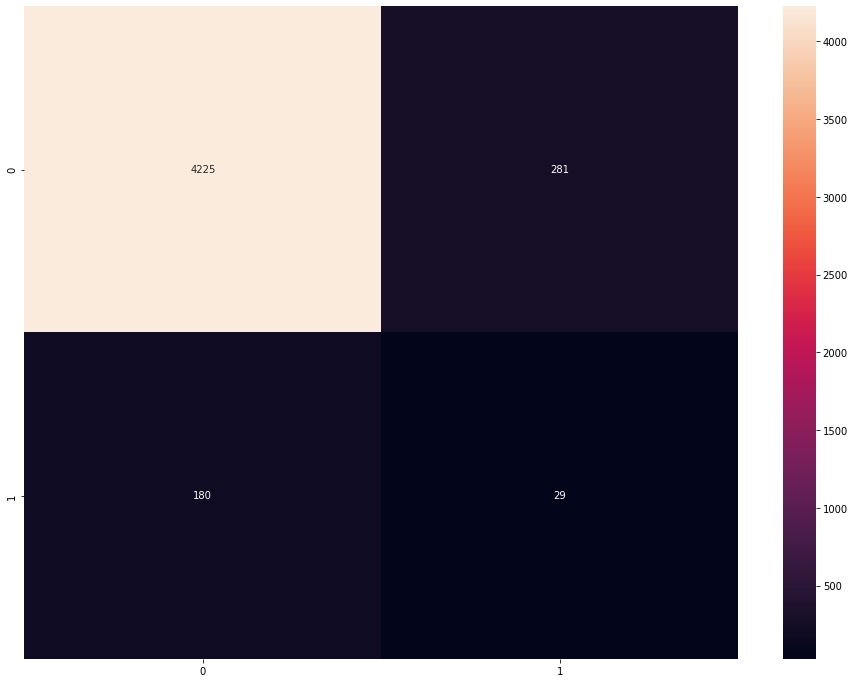

In [251]:
# Caso corte en 20%
cm_20 = confusion_matrix(Y, df_probs["preds_20"])
f = sns.heatmap(cm_20, annot=True, fmt='d')

In [252]:
print(classification_report(Y, df_probs["preds_20"]))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      4506
         1.0       0.09      0.14      0.11       209

    accuracy                           0.90      4715
   macro avg       0.53      0.54      0.53      4715
weighted avg       0.92      0.90      0.91      4715



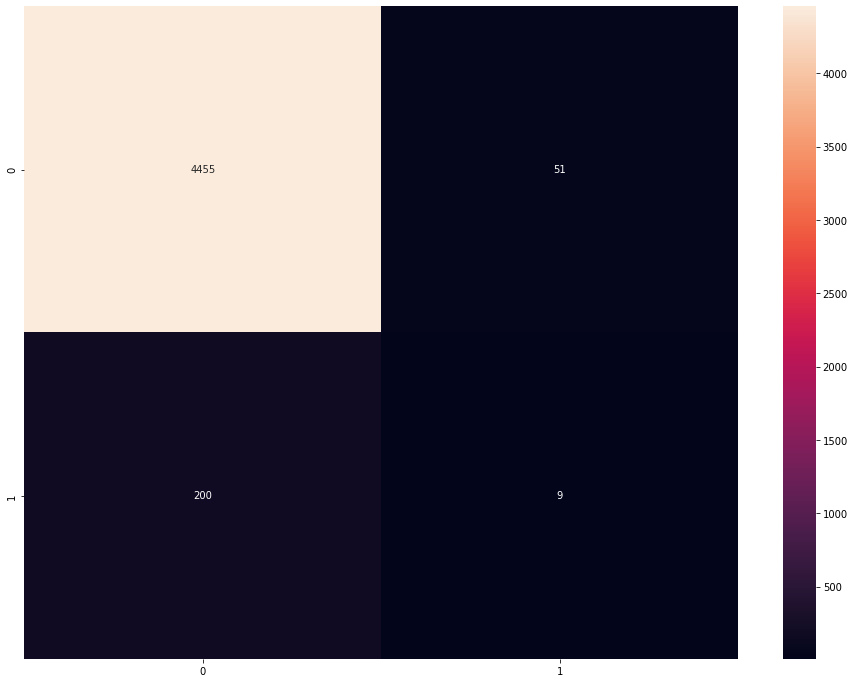

In [253]:
# Caso corte en 30%
cm_30 = confusion_matrix(Y, df_probs["preds_30"])
f = sns.heatmap(cm_30, annot=True, fmt='d')

In [254]:
print(classification_report(Y, df_probs["preds_30"]))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      4506
         1.0       0.15      0.04      0.07       209

    accuracy                           0.95      4715
   macro avg       0.55      0.52      0.52      4715
weighted avg       0.92      0.95      0.93      4715



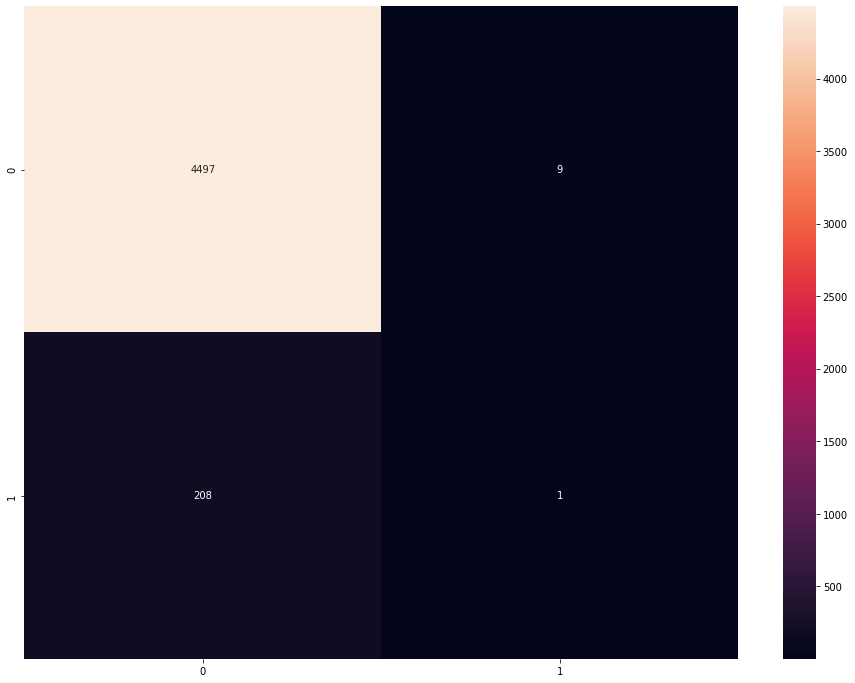

In [255]:
# Caso corte en 40%
cm_40 = confusion_matrix(Y, df_probs["preds_40"])
f = sns.heatmap(cm_40, annot=True, fmt='d')

In [256]:
print(classification_report(Y, df_probs["preds_40"]))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      4506
         1.0       0.10      0.00      0.01       209

    accuracy                           0.95      4715
   macro avg       0.53      0.50      0.49      4715
weighted avg       0.92      0.95      0.93      4715



Vemos que el aumento del RECALL para la clase 1 (stroke = 1) se da en el corte del 10% aumentando a cercano un 42%. Ahora considerando la naturaleza de nuestros datos y lo que queremos predecir o clasificar que es si un paciente ha tenido un accidente cerebrovascular, el corte de 10% no es lo apropiado.

Recordemos que el algoritmo KNN nos permite realizar una predicción preliminar por lo que este 42% de RECALL podemos considerarlo como base para la aplicación de otros modelos de clasificación donde debemos esperar un mejor rendimiento o mejores metricas.